# NEUROPREDICT 🧠

# 🎯 ¿Qué entrega este notebook?
✔ Te deja exactamente 15 features basadas en:

* importancia del modelo
* RFE
* correlaciones

✔ Entrena con SMOTETomek sin fuga de datos

✔ Optimiza para alta sensibilidad clínica (Recall)

✔ Ajusta el umbral final para priorizar detección temprana

✔ Mide:
* ecall

* Precision

* F1

* AUC-PR (crítica para datos desbalanceados)

* ROC-AUC

* Matriz de confusión

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

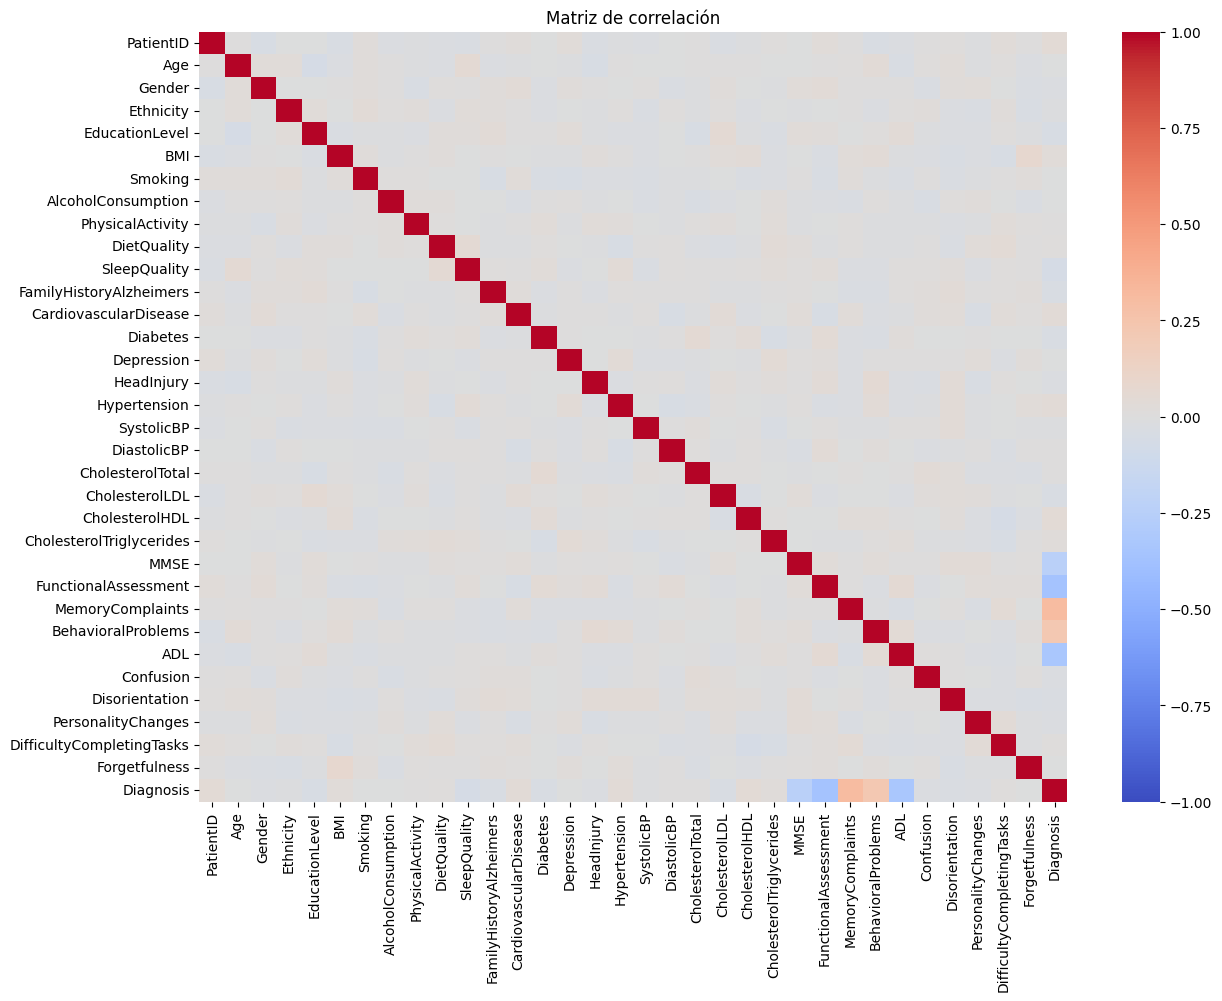

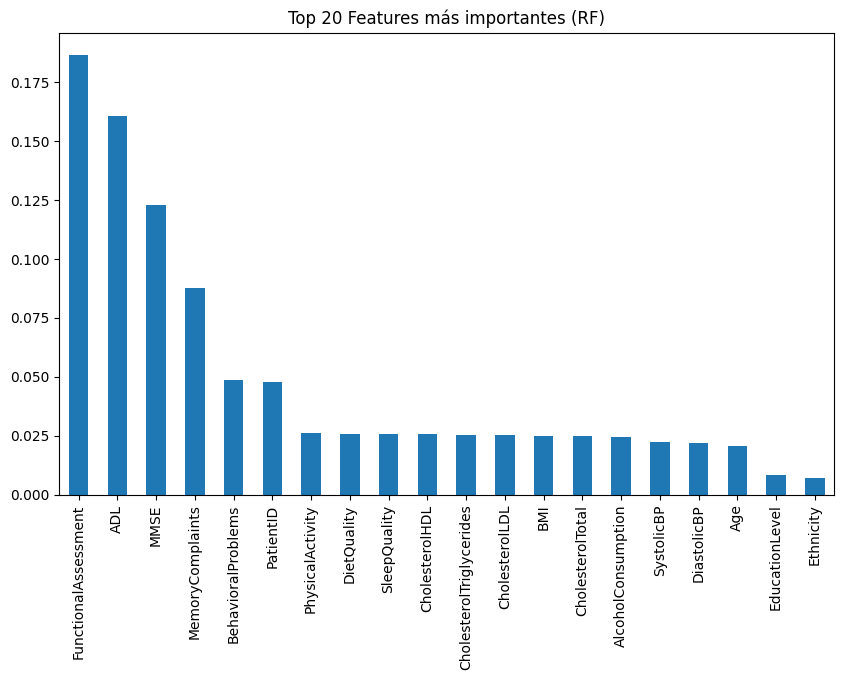


Top 20 Features:
 FunctionalAssessment        0.186590
ADL                         0.160365
MMSE                        0.122620
MemoryComplaints            0.087514
BehavioralProblems          0.048524
PatientID                   0.047547
PhysicalActivity            0.025988
DietQuality                 0.025799
SleepQuality                0.025752
CholesterolHDL              0.025750
CholesterolTriglycerides    0.025280
CholesterolLDL              0.025251
BMI                         0.024908
CholesterolTotal            0.024722
AlcoholConsumption          0.024227
SystolicBP                  0.022332
DiastolicBP                 0.021834
Age                         0.020443
EducationLevel              0.008429
Ethnicity                   0.007039
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


=== FEATURES SELECCIONADAS (15) ===
['EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'DifficultyCompletingTasks']

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       278
           1       0.70      0.86      0.77       152

    accuracy                           0.82       430
   macro avg       0.80      0.83      0.81       430
weighted avg       0.84      0.82      0.82       430


=== MATRIZ DE CONFUSIÓN ===
[[222  56]
 [ 22 130]]

ROC-AUC: 0.8905480878455131
AUC-PR (Average Precision): 0.8306742423266734


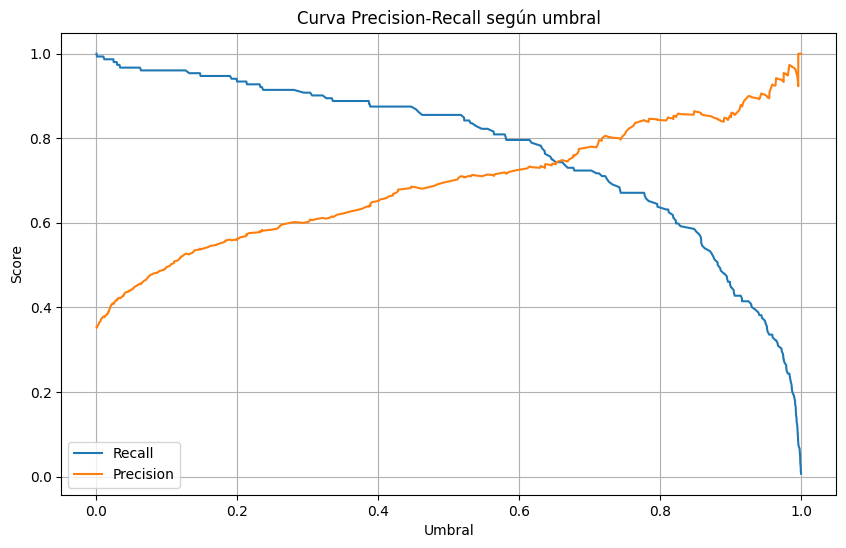


Umbral óptimo para Recall ≥ 0.90: 0.32122450154476995

=== Reporte con umbral ajustado == Gardener ===
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       278
           1       0.61      0.90      0.73       152

    accuracy                           0.76       430
   macro avg       0.77      0.79      0.76       430
weighted avg       0.82      0.76      0.77       430

Matriz de confusión (umbral ajustado):
[[191  87]
 [ 15 137]]


In [ ]:
# ============================
# 0. IMPORTS
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (classification_report, confusion_matrix,
                             precision_recall_curve, roc_auc_score,
                             average_precision_score)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek

# ============================
# 1. CARGAR DATASET
# ============================
df = pd.read_csv("Data/alzheimers_disease_data.csv")

print(df.head())
print(df.info())

# Asegurar que Diagnosis sea numérico:
df['Diagnosis'] = df['Diagnosis'].astype(int)

# Excluir la columna 'DoctorInCharge' que no es numérica antes de calcular la correlación
df_numeric = df.drop(columns=['DoctorInCharge'])

# ============================
# 2. SEPARAR FEATURES Y TARGET
# ============================
y = df['Diagnosis']
X = df.drop('Diagnosis', axis=1)
# Eliminar la columna 'DoctorInCharge' de X
X = X.drop('DoctorInCharge', axis=1)

# Detectar numéricas/categóricas (aunque ya sean numéricas)
numerical_features = X.columns.tolist()

# ============================
# 3. MATRIZ DE CORRELACIÓN
# ============================
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', vmin=-1, vmax=1) # Usar df_numeric aquí
plt.title("Matriz de correlación")
plt.show()

# ============================
# 4. IMPORTANCIA DE FEATURES (RANDOM FOREST)
# ============================
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(20).plot(kind='bar')
plt.title("Top 20 Features más importantes (RF)")
plt.show()

print("\nTop 20 Features:\n", importances.head(20))

# ============================
# 5. FEATURE SELECTION CON RFE (15 FEATURES)
# ============================
rfe_model = LogisticRegression(max_iter=500)
selector = RFE(rfe_model, n_features_to_select=15)

selector.fit(X, y)

selected_features = X.columns[selector.support_].tolist()
print("\n=== FEATURES SELECCIONADAS (15) ===")
print(selected_features)

# Nos quedamos con estas 15 columnas
X_selected = X[selected_features]

# ============================
# 6. TRAIN/TEST SPLIT
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 7. PIPELINE CON SMOTETOMEK
# ============================
pipeline = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('resample', SMOTETomek(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

# ============================
# 8. MÉTRICAS EN TEST SET
# ============================
preds = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:,1]

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, preds))

print("\n=== MATRIZ DE CONFUSIÓN ===")
print(confusion_matrix(y_test, preds))

print("\nROC-AUC:", roc_auc_score(y_test, probs))
print("AUC-PR (Average Precision):", average_precision_score(y_test, probs))

# ============================
# 9. AJUSTE DE UMBRAL PARA MAXIMIZAR RECALL
# ============================
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.figure(figsize=(10,6))
plt.plot(thresholds, recall[:-1], label="Recall")
plt.plot(thresholds, precision[:-1], label="Precision")
plt.xlabel("Umbral")
plt.ylabel("Score")
plt.title("Curva Precision-Recall según umbral")
plt.legend()
plt.grid()
plt.show()

# Elegir un umbral que dé Recall >= 0.90
desired_recall = 0.90
idx = np.where(recall >= desired_recall)[0][-1]
best_threshold = thresholds[idx]

print("\nUmbral óptimo para Recall \u2265 0.90:", best_threshold)

# Predicciones ajustadas
adjusted_preds = (probs >= best_threshold).astype(int)

print("\n=== Reporte con umbral ajustado == Gardener ===")
print(classification_report(y_test, adjusted_preds))

print("Matriz de confusión (umbral ajustado):")
print(confusion_matrix(y_test, adjusted_preds))